In [ ]:
%%time

!pip install -U matplotlib
!pip install -U bioinfokit
!pip install -U yellowbrick
!pip install -U statsmodels

In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv("mcdonalds.csv")
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


# Exploratory Data Analysis

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [6]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [7]:
df.shape

(1453, 15)

In [8]:
df.duplicated().sum()

22

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1448    False
1449    False
1450    False
1451    False
1452    False
Length: 1453, dtype: bool

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(1431, 15)

In [12]:
#Checking for the count of below variables
df['Gender'].value_counts()
df['VisitFrequency'].value_counts()
df['Like'].value_counts()

+3              225
+2              180
0               168
+4              156
+1              152
I hate it!-5    150
I love it!+5    140
-3               73
-4               70
-2               59
-1               58
Name: Like, dtype: int64

In [13]:
df['VisitFrequency'].value_counts()

Once a month             427
Every three months       339
Once a year              252
Once a week              232
Never                    128
More than once a week     53
Name: VisitFrequency, dtype: int64

In [14]:
df['Gender'].value_counts()

Female    772
Male      659
Name: Gender, dtype: int64

# Data Preprocessing

In [15]:
df1 = df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1)

In [16]:
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [17]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df1.apply(LabelEncoder().fit_transform)
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


# Step 4: Exploring Data

In [18]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [19]:
df.shape

(1431, 15)

In [20]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


# PCA

In [21]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(df_encoded)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)

In [22]:
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.693292,-0.457790,0.286232,-0.873823,-1.505703,0.455598,-0.042382,-0.702925,0.353196,0.317433,1.702108
1,-0.470508,0.363136,-1.602268,-0.032383,0.460810,-0.434931,0.108627,0.450103,0.226779,0.189278,1.467193
2,0.181643,1.696828,-0.405835,3.323900,-1.285681,0.145801,-0.624131,-0.673397,1.366467,-1.261705,-0.133832
3,-0.130097,-1.149804,-1.021156,0.459375,1.149766,-0.848571,0.035911,0.425610,-1.565772,0.097576,-0.233354
4,-0.053154,-1.392333,0.762014,0.476912,-0.257014,-0.866214,-1.811420,-0.676842,1.619899,0.092497,-0.033580


In [23]:
explained_variance_ratio = pca.explained_variance_ratio_
singular_values = pca.singular_values_
components = pca.components_

print("Standard deviation:\n", singular_values)
print("Proportion of Variance:\n", explained_variance_ratio)
print("Cumulative Proportion:\n", explained_variance_ratio.cumsum())

Standard deviation:
 [63.40791971 48.19852507 44.36753329 39.33509744 36.26425037 33.46661493
 31.98741736 29.19626576 27.44992014 21.10824266 19.28281619]
Proportion of Variance:
 [0.25541988 0.14758261 0.12505419 0.09829426 0.08354589 0.07115268
 0.0650019  0.05415297 0.0478685  0.02830557 0.02362156]
Cumulative Proportion:
 [0.25541988 0.40300248 0.52805667 0.62635093 0.70989682 0.7810495
 0.8460514  0.90020437 0.94807287 0.97637844 1.        ]


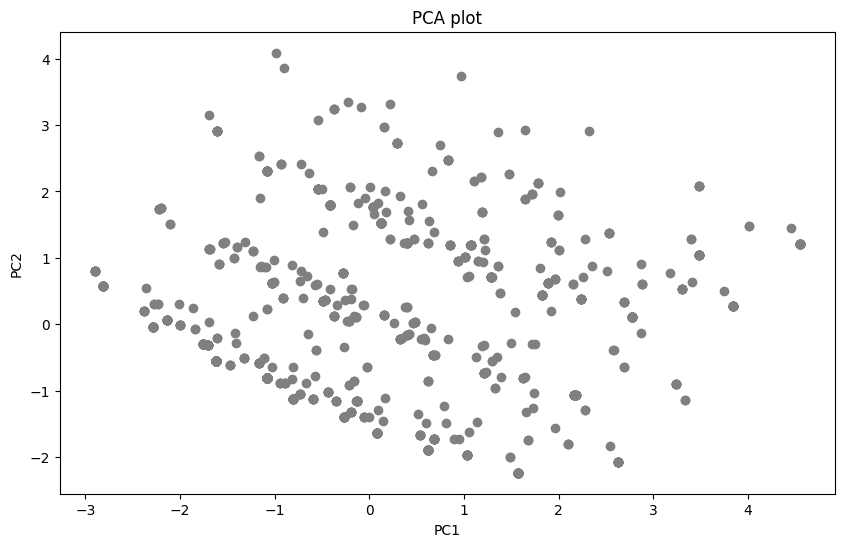

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(pc[:, 0], pc[:, 1], c='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot')
plt.show()

In [25]:
loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = df_encoded.columns.values
loadings_df = loadings_df.set_index('feature')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,-0.404960,0.287285,-0.260870,0.023466,0.345118,-0.121699,0.162425,0.018874,-0.194177,0.691746,-0.089428
convenient,-0.308171,-0.047352,-0.319721,-0.019837,-0.437172,0.187075,-0.658464,0.160599,-0.336700,0.028941,0.022027
spicy,-0.025301,0.069101,0.009648,0.844309,-0.191500,0.440839,0.208775,-0.034704,0.025504,0.058195,-0.042354
fattening,0.177350,-0.207910,-0.607235,-0.031682,0.090732,0.104294,-0.031825,-0.721158,0.097219,-0.019861,-0.074462
greasy,0.267672,-0.133103,-0.397911,0.325045,0.339919,-0.271844,-0.297280,0.492856,0.353091,-0.015175,-0.031903
fast,-0.213338,-0.283126,-0.213410,0.085312,-0.567880,-0.570552,0.396680,0.052292,0.100240,0.018751,-0.054750
cheap,-0.291992,-0.572497,0.122903,0.119250,0.260293,0.017599,-0.010894,-0.061065,-0.061677,0.058699,0.691739
tasty,-0.424724,0.244535,-0.271903,0.068665,0.283812,-0.048637,0.201324,0.061334,-0.212530,-0.713282,0.004178
expensive,0.293961,0.565153,-0.183958,0.032525,-0.210042,-0.169913,0.015946,-0.062704,-0.010894,0.026398,0.693758


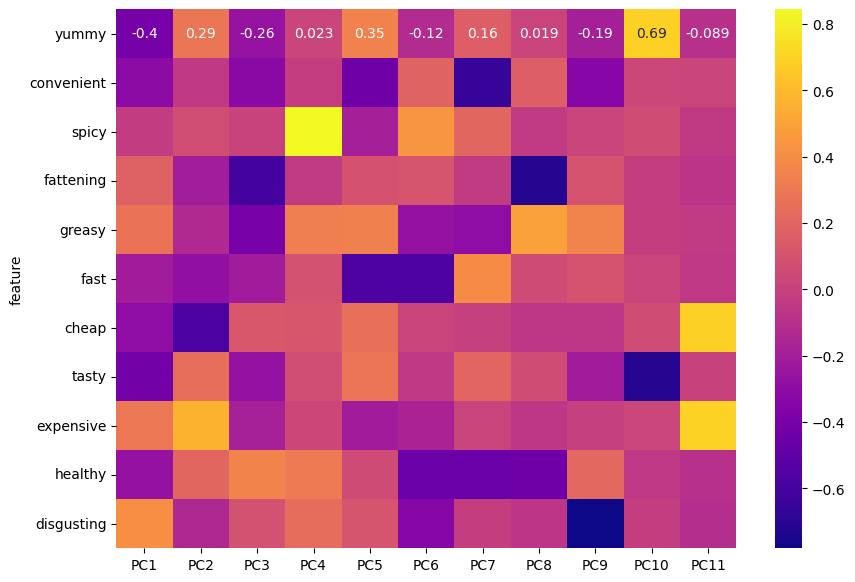

In [26]:
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.heatmap(loadings_df, annot=True, cmap='plasma')
plt.show()

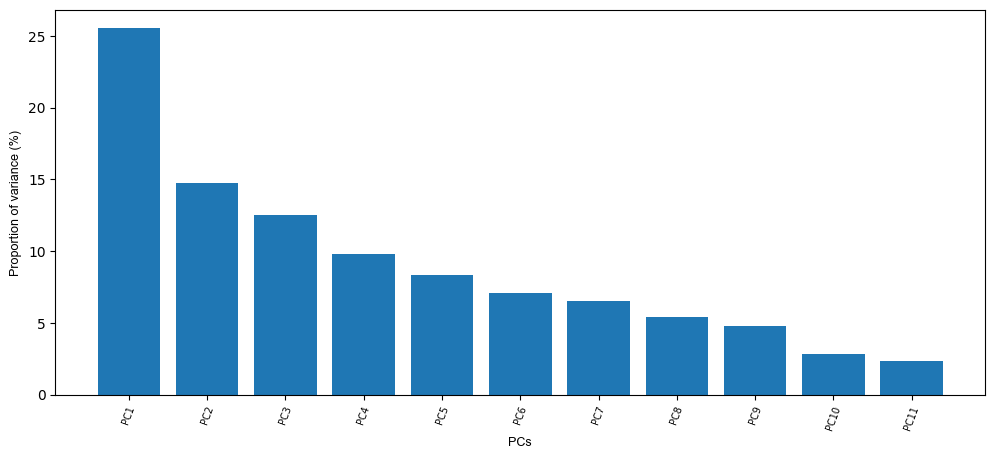

In [27]:
#Scree plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(12,5))

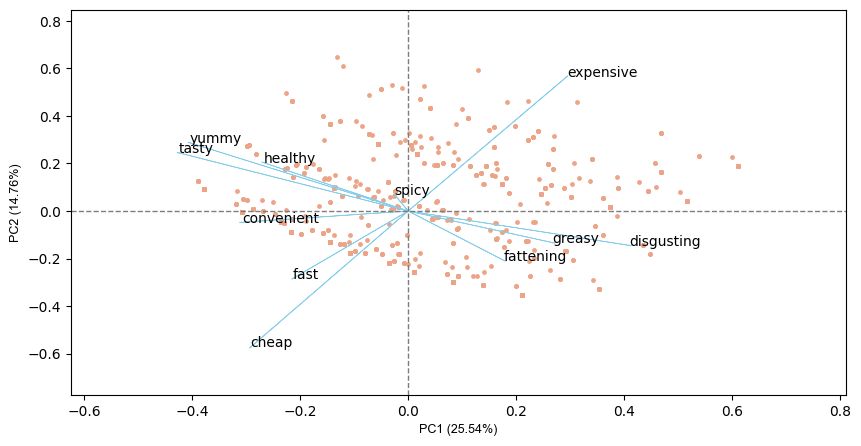

In [28]:
from bioinfokit.visuz import cluster

pca_scores = PCA().fit_transform(pca_data)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

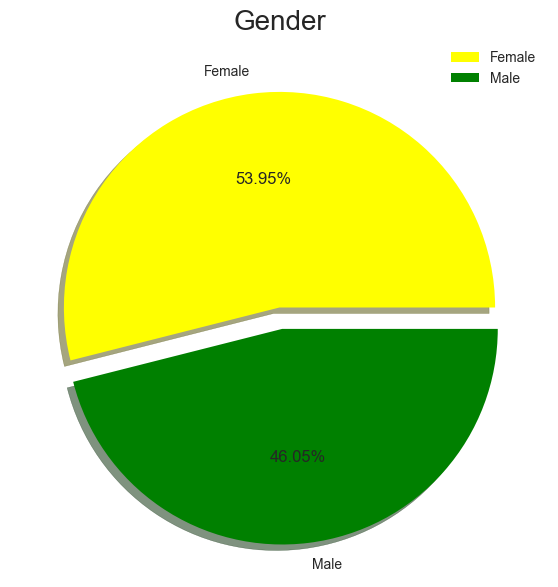

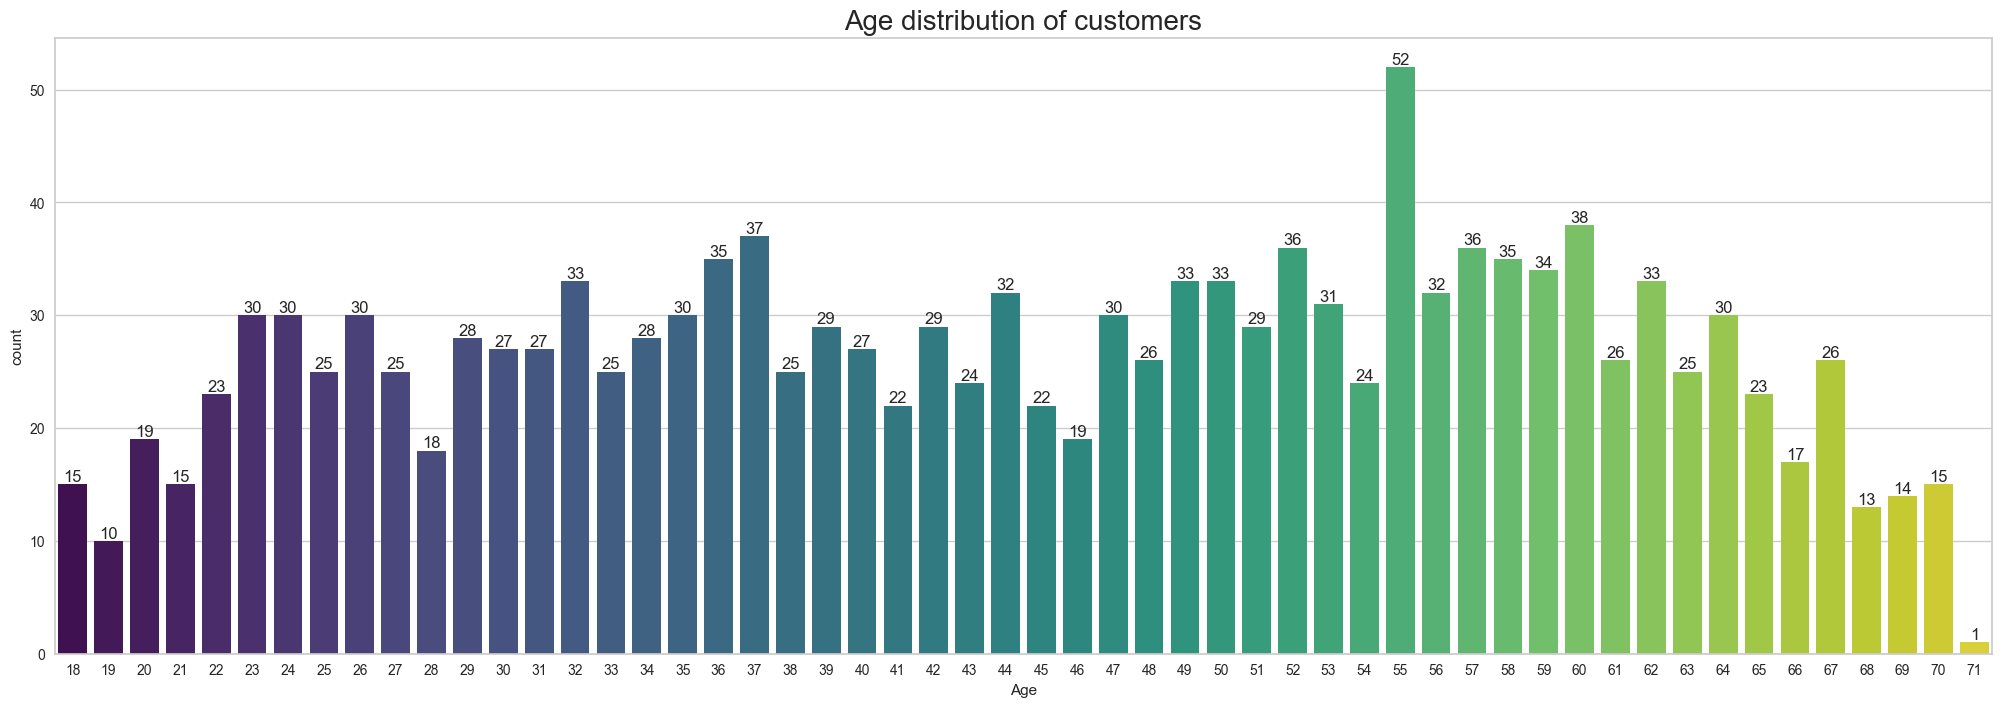

In [58]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['yellow', 'green']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# Age: Mcdonalds recieve more customers of age between 50-60 and 35-40
plt.rcParams['figure.figsize'] = (25, 8)
datag = sns.countplot(x=df['Age'], palette = 'viridis')
datag.bar_label(datag.containers[0])
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

In [30]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


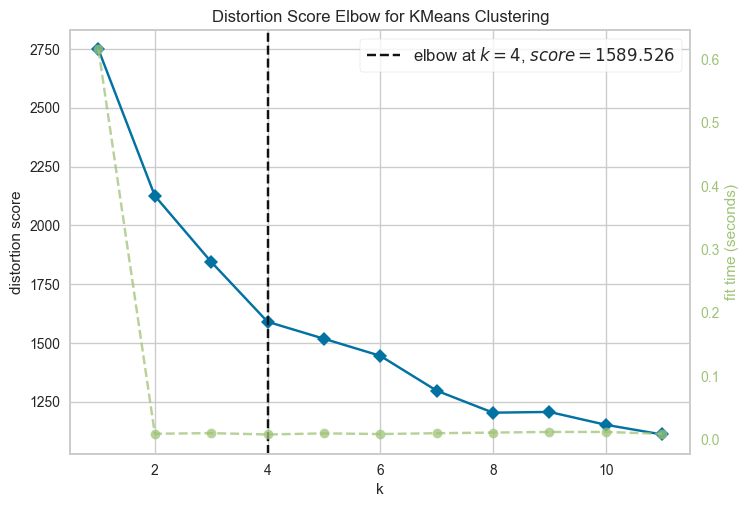

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_encoded)
visualizer.show()

# Step 5: Extracting Segments

# Using KMeans

In [32]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)
df['cluster_num'] = kmeans.labels_

print ('Labels:', kmeans.labels_)
print ('WCSS:', kmeans.inertia_)
print('No. of iterations: ', kmeans.n_iter_)
print('Cluster centroids: ', kmeans.cluster_centers_)

Labels: [0 1 1 ... 1 3 2]
WCSS: 1699.9995072731972
No. of iterations:  8
Cluster centroids:  [[0.08421053 0.85789474 0.07894737 0.74210526 0.27894737 0.80526316
  0.10526316 0.22631579 0.60526316 0.14736842 0.14736842]
 [0.89491525 0.95932203 0.13898305 0.92542373 0.6779661  0.87457627
  0.11864407 0.95254237 0.93220339 0.21355932 0.16271186]
 [0.00837989 0.77094972 0.07541899 0.97486034 0.7849162  0.8603352
  0.67039106 0.06145251 0.32402235 0.04189944 0.69553073]
 [0.85544218 0.97959184 0.09013605 0.81122449 0.37414966 0.96428571
  0.94727891 0.9744898  0.0170068  0.30782313 0.04251701]]


In [33]:
from collections import Counter
print('Cluster size: ', Counter(kmeans.labels_))

Cluster size:  Counter({3: 588, 2: 358, 1: 295, 0: 190})


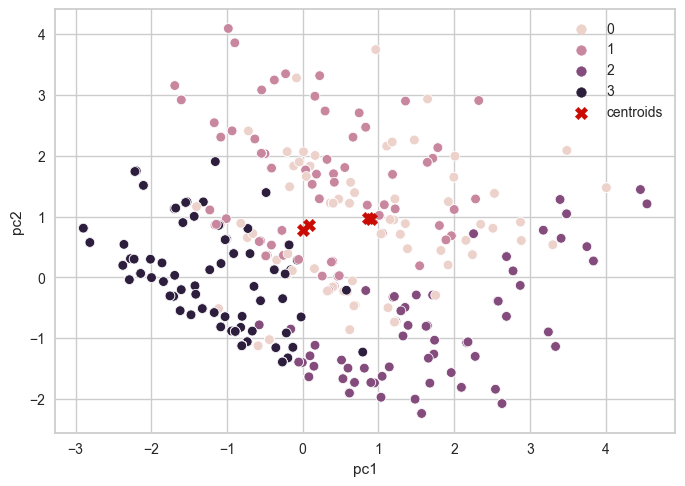

In [34]:
#Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

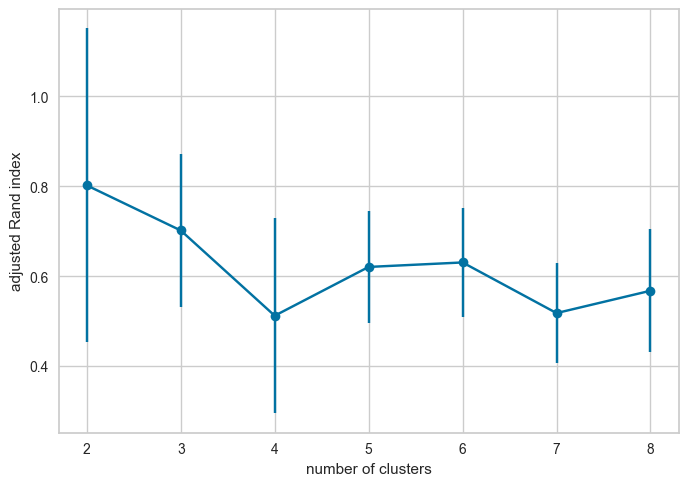

In [36]:
# set the random seed
np.random.seed(1234)

# perform K-means clustering with 2 to 8 clusters and 10 repetitions
n_clusters = range(2, 9)
n_reps = 10
scores = []
for k in n_clusters:
    km = KMeans(n_clusters=k, max_iter=300, n_init=n_reps).fit(df_encoded)
    km_labels = km.labels_
    score_k = []
    for i in range(n_reps):
        km_rep = KMeans(n_clusters=k, max_iter=300, n_init=1).fit(df_encoded)
        km_rep_labels = km_rep.labels_
        score_k.append(adjusted_rand_score(km_labels, km_rep_labels))
    scores.append(score_k)

# plot the adjusted Rand index scores for each number of clusters
plt.errorbar(n_clusters, np.mean(scores, axis=1), yerr=np.std(scores, axis=1), fmt="o-")
plt.xlabel("number of clusters")
plt.ylabel("adjusted Rand index")
plt.show()

In [37]:
# count the frequency of each value in the "Like" column
like_counts = df["Like"].value_counts()

# reverse the order of the resulting Series
like_counts = like_counts.iloc[::-1]

# print the results
print(like_counts)

-1               58
-2               59
-4               70
-3               73
I love it!+5    140
I hate it!-5    150
+1              152
+4              156
0               168
+2              180
+3              225
Name: Like, dtype: int64


In [38]:
# convert the "Like" column to numeric and subtract from 6 to create a new column
df["Like.n"] = 6 - pd.to_numeric(df["Like"], errors="coerce")

# count the frequency of each value in the "Like.n" column
like_n_counts = df["Like.n"].value_counts()

# print the results
print(like_n_counts)

3.0     225
4.0     180
6.0     168
2.0     156
5.0     152
9.0      73
10.0     70
8.0      59
7.0      58
Name: Like.n, dtype: int64


## Profiling Segments

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [40]:
# compute the pairwise distances between the columns of MD_x
D = np.transpose(df_encoded)
D = linkage(D, method = "average")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [21.875, 21.875, 74.375, 74.375]],
 'dcoord': [[0.0, 15.132745950421556, 15.132745950421556, 0.0],
  [0.0, 13.784048752090222, 13.784048752090222, 0.0],
  [0.0, 16.76281577344289, 16.76281577344289, 13.784048752090222],
  [0.0, 23.56716713364229, 23.56716713364229, 16.76281577344289],
  [15.132745950421556,
   23.968548145468752,
   23.968548145468752,
   23.56716713364229],
  [0.0, 18.24828759089466, 18.24828759089466, 0.0],
  [0.0, 22.172201406011716, 22.172201406011716, 18.24828759089466],
  [0.0, 23.52566363772721, 23.52566363772721, 22.172201406011716],
  [0.0, 26.08767617745484, 26.08767617745484, 23.52566363772721],
  [23.968548145468752, 29.9744060504673, 29.9744060504673, 26.08767617745484]],
 'ivl': ['0', '7', 

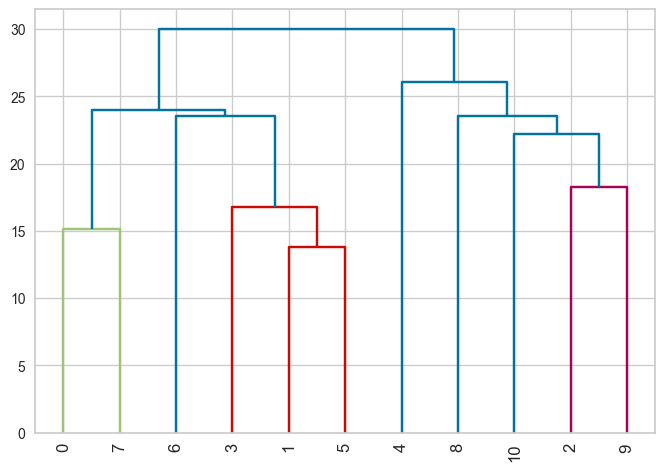

In [41]:
# plot the dendrogram
dendrogram(D, truncate_mode = "lastp", p = 12, leaf_rotation = 90,
           leaf_font_size = 12, show_contracted = True)

In [42]:
MD_x = df.iloc[:, 0:11]

# Convert "Yes" to 1 and everything else to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means
column_means = MD_x.mean()

# Round the column means to 2 decimal places
rounded_column_means = column_means.round(2)

print(rounded_column_means)

yummy         0.55
convenient    0.91
spicy         0.10
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [43]:
# Set seed for reproducibility
import numpy as np
np.random.seed(1234)

# Perform k-means clustering
inertia_values = []
cluster_labels = {}
for k in range(2, 9):
    km = KMeans(n_clusters=k, n_init=10, random_state=1234)
    km.fit(MD_x)
    inertia_values.append(km.inertia_)
    cluster_labels[k] = km.labels_

# Find optimal k using the elbow method
# (here, you might need to visualize the inertia_values to choose the appropriate number of clusters)
optimal_k = 3  # assuming you've determined this from the elbow plot

# Get cluster labels for the optimal number of clusters
optimal_cluster_labels = cluster_labels[optimal_k]

# Relabel clusters if needed
# (not necessary in scikit-learn since cluster labels are already sorted)
# If relabeling is needed, you can perform it manually based on your criteria

# Print cluster labels for the optimal number of clusters
print(optimal_cluster_labels)

[1 2 2 ... 2 0 1]


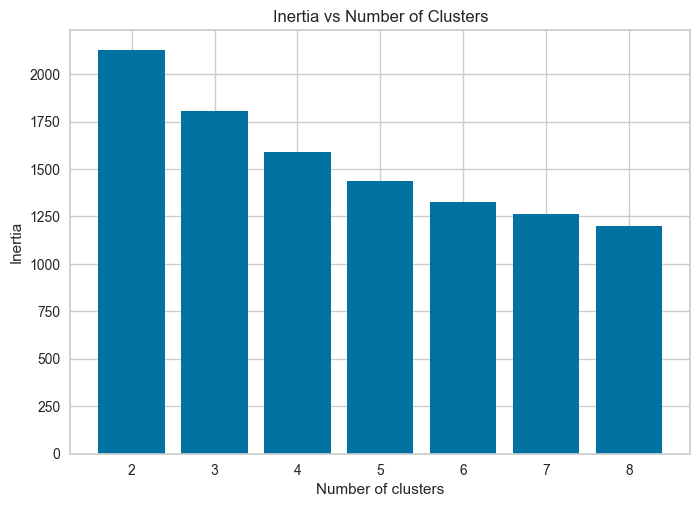

In [44]:
plt.bar(range(2, 9), inertia_values)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()

# Describing Segments

In [45]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
crosstab 

Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
cluster_num,,,,,,,,,,,
0,25,17,15,7,15,14,14,11,43,27,2
1,34,49,65,43,5,7,8,4,30,8,42
2,24,25,7,0,21,29,46,50,45,111,0
3,69,89,138,106,17,9,5,5,50,4,96


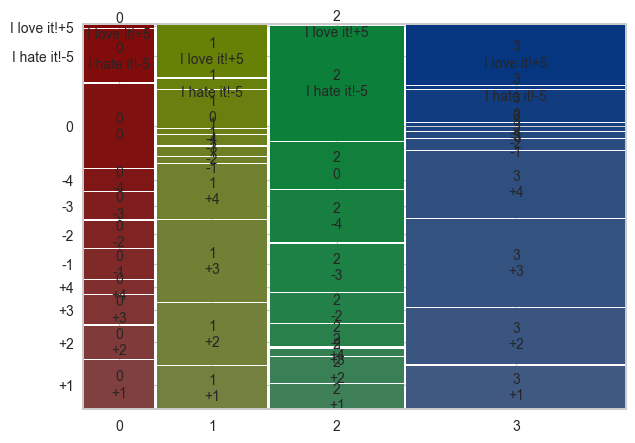

In [46]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [47]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,87,103
1,143,152
2,187,171
3,355,233


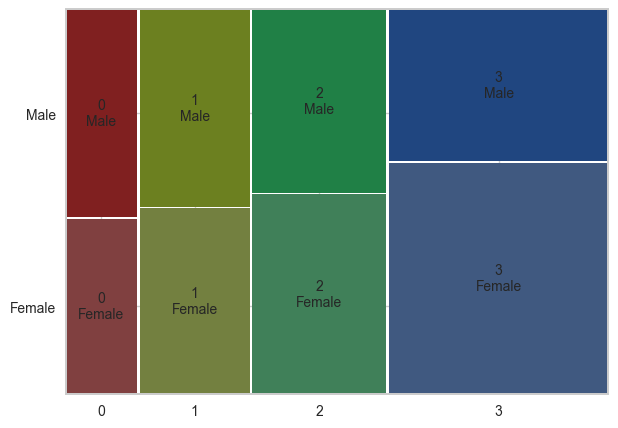

In [48]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

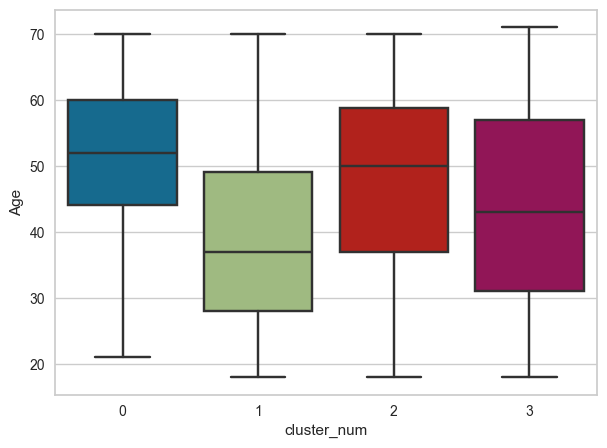

In [49]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=df)

## Selecting Target Segment

In [50]:
#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.605263
1,1,2.586441
2,2,2.729050
3,3,2.624150


In [51]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.084211
1,1,3.969492
2,2,6.293296
3,3,3.838435


In [52]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.542105
1,1,0.515254
2,2,0.477654
3,3,0.396259


In [53]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.542105,5.084211,2.605263
1,1,0.515254,3.969492,2.586441
2,2,0.477654,6.293296,2.729050
3,3,0.396259,3.838435,2.624150


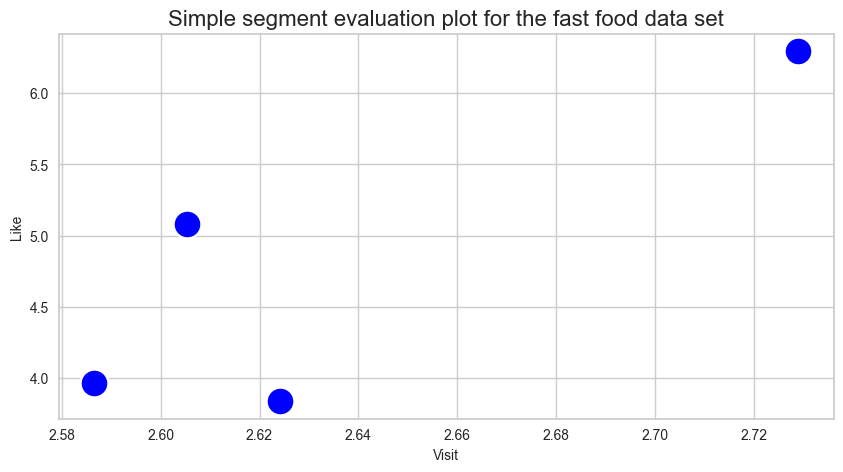

In [54]:
#Target segments

plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="blue")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 16) 
plt.xlabel("Visit", fontsize = 10) 
plt.ylabel("Like", fontsize = 10) 
plt.show()